In [1]:
%ls


drive/  sample_data/


In [2]:
%cd drive/MyDrive/imaging_course/Notebooks/


/content/drive/.shortcut-targets-by-id/1cvJ2Hes9owrL3S12PvcKfeDnl8solhU_/imaging_course/Notebooks


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from skimage import exposure
from skimage.filters import threshold_otsu
from sklearn import cluster
from skimage import data

Unsharp masking

In [4]:
xray_path = '/content/drive/MyDrive/imaging_course/Notebooks/images/chest_xray.png'
img=cv2.imread(xray_path,0)
image = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

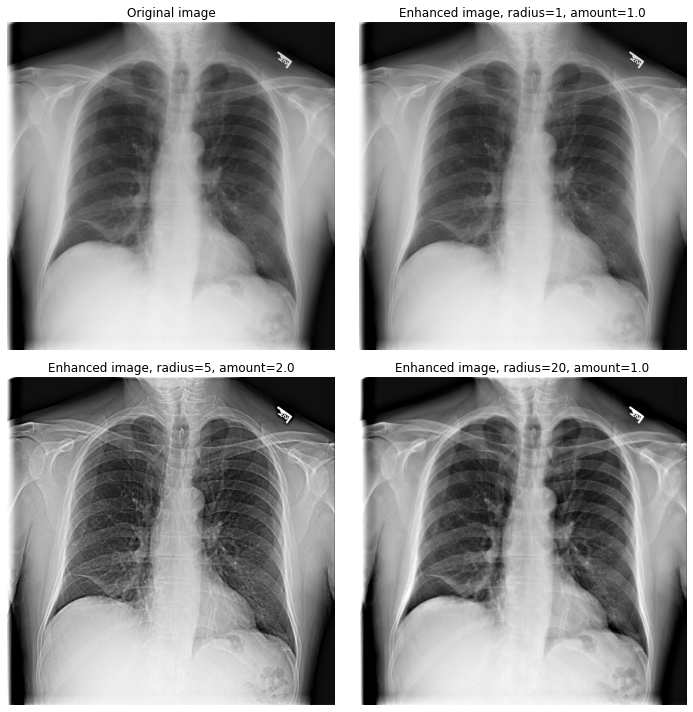

In [5]:
from skimage.filters import unsharp_mask

result_1 = unsharp_mask(image, radius=1, amount=1)
result_2 = unsharp_mask(image, radius=5, amount=2)
result_3 = unsharp_mask(image, radius=20, amount=1)

fig, axes = plt.subplots(nrows=2, ncols=2,
                         sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(result_1, cmap=plt.cm.gray)
ax[1].set_title('Enhanced image, radius=1, amount=1.0')
ax[2].imshow(result_2, cmap=plt.cm.gray)
ax[2].set_title('Enhanced image, radius=5, amount=2.0')
ax[3].imshow(result_3, cmap=plt.cm.gray)
ax[3].set_title('Enhanced image, radius=20, amount=1.0')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

High boost spatial filter

In [6]:
image = image.astype ('float32')
kernel = -1*np.ones((3,3))

x = 7
kernel [1, 1] = x
high_boost_7 = cv2.filter2D(image,-1,kernel)

x = 8
kernel [1, 1] = x
high_boost_8 = cv2.filter2D(image,-1,kernel)

x = 10
kernel [1, 1] = x
high_boost_10 = cv2.filter2D(image,-1,kernel)

Text(0.5, 1.0, 'x = 10')

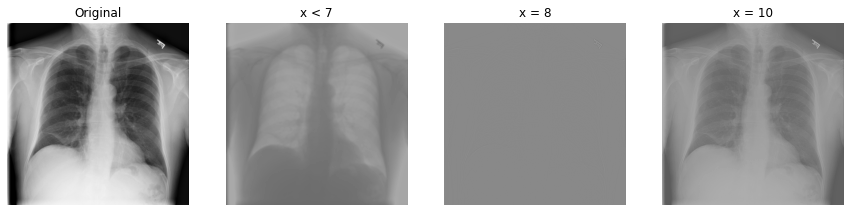

In [7]:
fig=plt.figure(figsize=(15,8))
fig.add_subplot(1,4,1)
plt.imshow(image,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,4,2)
plt.imshow(high_boost_7,cmap='gray')
plt.axis("off")
plt.title("x < 7")

fig.add_subplot(1,4,3)
plt.imshow(high_boost_8,cmap='gray')
plt.axis("off")
plt.title("x = 8")

fig.add_subplot(1,4,4)
plt.imshow(high_boost_10,cmap='gray')
plt.axis("off")
plt.title("x = 10")

Sobel 

Text(0.5, 1.0, 'Laplacian')

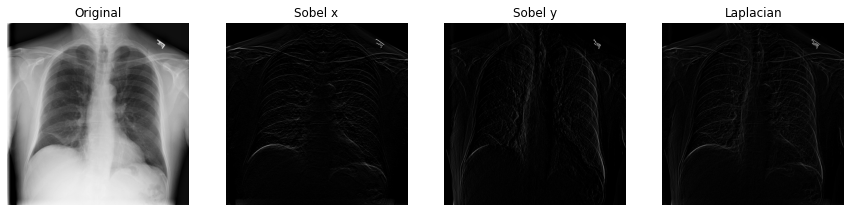

In [8]:
xray_path = '/content/drive/MyDrive/imaging_course/Notebooks/images/chest_xray.png'
img=cv2.imread(xray_path,0)
image = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

kernelx = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
kernely = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

sobelx = cv2.filter2D(image, -1, kernelx)/255
sobely = cv2.filter2D(image, -1, kernely)/255
laplacian = np.sqrt( np.square(sobelx) + np.square(sobely))

fig=plt.figure(figsize=(15,8))
fig.add_subplot(1,4,1)
plt.imshow(image,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,4,2)
plt.imshow(sobelx,cmap='gray')
plt.axis("off")
plt.title("Sobel x")

fig.add_subplot(1,4,3)
plt.imshow(sobely,cmap='gray')
plt.axis("off")
plt.title("Sobel y")

fig.add_subplot(1,4,4)
plt.imshow(laplacian,cmap='gray')
plt.axis("off")
plt.title("Laplacian")

Text(0.5, 1.0, 'Laplacian')

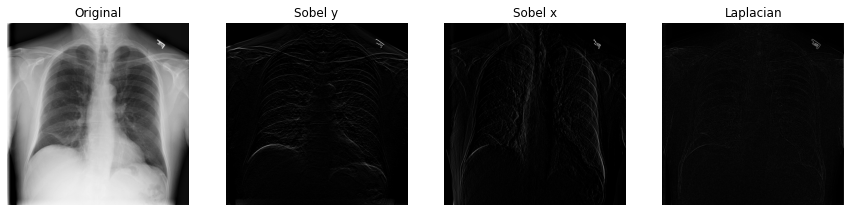

In [9]:
xray_path = '/content/drive/MyDrive/imaging_course/Notebooks/images/chest_xray.png'
img=cv2.imread(xray_path,0)
image = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

laplacian = cv2.Laplacian(image, cv2.CV_8U, ksize=3)
sobelx = cv2.Sobel(image,cv2.CV_8U,1,0,ksize=3)
sobely = cv2.Sobel(image,cv2.CV_8U,0,1,ksize=3)

fig=plt.figure(figsize=(15,8))
fig.add_subplot(1,4,1)
plt.imshow(image,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,4,3)
plt.imshow(sobelx,cmap='gray')
plt.axis("off")
plt.title("Sobel x")

fig.add_subplot(1,4,2)
plt.imshow(sobely,cmap='gray')
plt.axis("off")
plt.title("Sobel y")

fig.add_subplot(1,4,4)
plt.imshow(laplacian,cmap='gray')
plt.axis("off")
plt.title("Laplacian")

Prewitt

Text(0.5, 1.0, 'Laplacian')

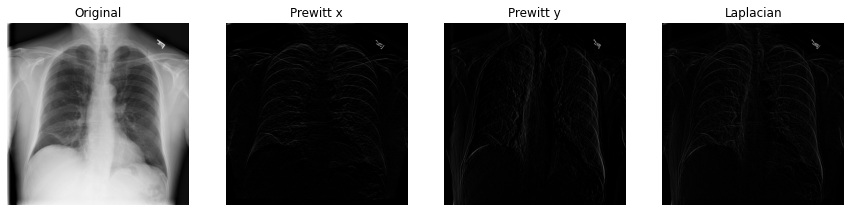

In [10]:
xray_path = '/content/drive/MyDrive/imaging_course/Notebooks/images/chest_xray.png'
img=cv2.imread(xray_path,0)
image = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewittx = cv2.filter2D(image, -1, kernelx)/255
prewitty = cv2.filter2D(image, -1, kernely)/255
laplacian = np.sqrt( np.square(prewittx) + np.square(prewitty))

fig=plt.figure(figsize=(15,8))
fig.add_subplot(1,4,1)
plt.imshow(image,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,4,2)
plt.imshow(prewittx,cmap='gray')
plt.axis("off")
plt.title("Prewitt x")

fig.add_subplot(1,4,3)
plt.imshow(prewitty,cmap='gray')
plt.axis("off")
plt.title("Prewitt y")

fig.add_subplot(1,4,4)
plt.imshow(laplacian,cmap='gray')
plt.axis("off")
plt.title("Laplacian")

Boxcar operators

(-0.5, 1023.5, 1023.5, -0.5)

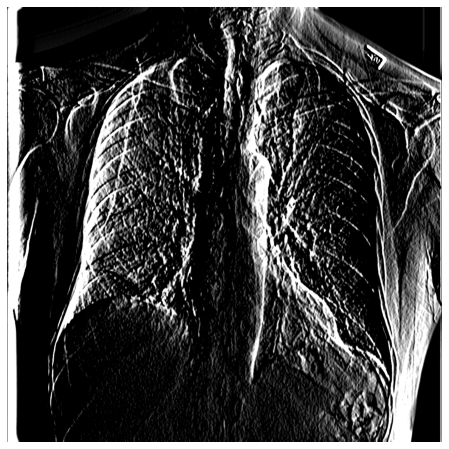

In [11]:
xray_path = '/content/drive/MyDrive/imaging_course/Notebooks/images/chest_xray.png'
img=cv2.imread(xray_path,0)
image = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
sobel_boxcar = np.array([[1, 1, 1, 0, -1, -1, -1],\
                         [1, 2, 2, 0, -2, -2, -1],\
                         [1, 2, 3, 0, -1, -2, -3],\
                         [1, 2, 3, 0, -3, -2, -1],\
                         [1, 2, 3, 0, -3, -2, -1],\
                         [1, 2, 2, 0, -2, -2, -1],\
                         [1, 1, 1, 0, -1, -1, -1]])
sobel_box = cv2.filter2D(image, -1, sobel_boxcar)/255
plt.rcParams["figure.figsize"] = (8,8)
plt.imshow (sobel_box, 'gray')
plt.axis("off")

Robinson compass masks

(-0.5, 1023.5, 1023.5, -0.5)

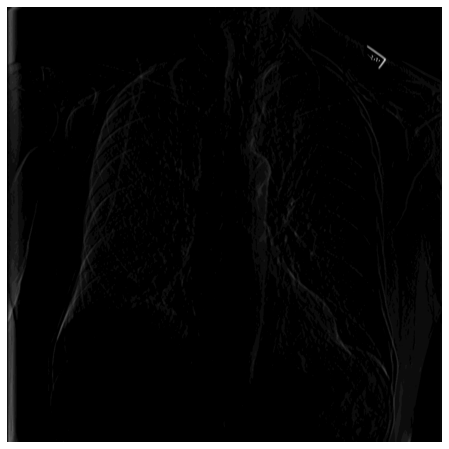

In [12]:
from scipy import ndimage
from math import pi
from skimage import util

xray_path = '/content/drive/MyDrive/imaging_course/Notebooks/images/chest_xray.png'
img=cv2.imread(xray_path,0)
image = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

h0_3 = np.array([
    [[-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]],

    [[-2, -1, 0],
    [-1, 0, 1],
    [0, 1, 2]],

    [[-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]],

    [[0, -1, -2],
    [1, 0, -1],
    [2, 1, 0]]
])

h4_7 = np.negative(h0_3)
e_k = np.zeros(image.shape)

h0_7 = np.concatenate((h0_3, h4_7), axis=0)

for filter in h0_7:
    e_k = np.maximum(cv2.filter2D(image, -1, sobel_boxcar.astype('float32')/255), e_k)


k_k = image
for v in range(0, image.shape[1]):
    for u in range(0, image.shape[0]):
        k_k[u][v] = e_k[u][v]
plt.rcParams["figure.figsize"] = (8,8)
plt.imshow (k_k, cmap = 'gray')
plt.axis("off")

Laplacian of Gaussian 

(-0.5, 1023.5, 1023.5, -0.5)

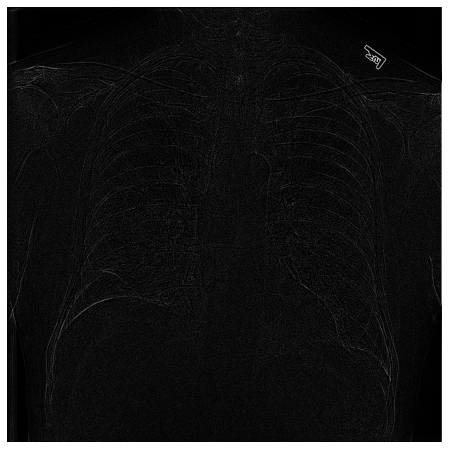

In [13]:
xray_path = '/content/drive/MyDrive/imaging_course/Notebooks/images/chest_xray.png'
img=cv2.imread(xray_path,0)
image = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
LoG_kernel = np.array([
                        [0, 0,  1, 0, 0],
                        [0, 1,  2, 1, 0],
                        [1, 2,-16, 2, 1],
                        [0, 1,  2, 1, 0],
                        [0, 0,  1, 0, 0]
                    ])
dog_img = cv2.filter2D(image, -1, LoG_kernel)/255
plt.rcParams["figure.figsize"] = (8,8)
plt.imshow (dog_img, cmap = 'gray')
plt.axis("off")

Canny edge detector

In [15]:
xray_path = '/content/drive/MyDrive/imaging_course/Notebooks/images/hand-x-ray.jpeg'
img=cv2.imread(xray_path,0)
image = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
canny_edge = cv2.Canny(image, 170, 250)

Text(0.5, 1.0, 'Original')

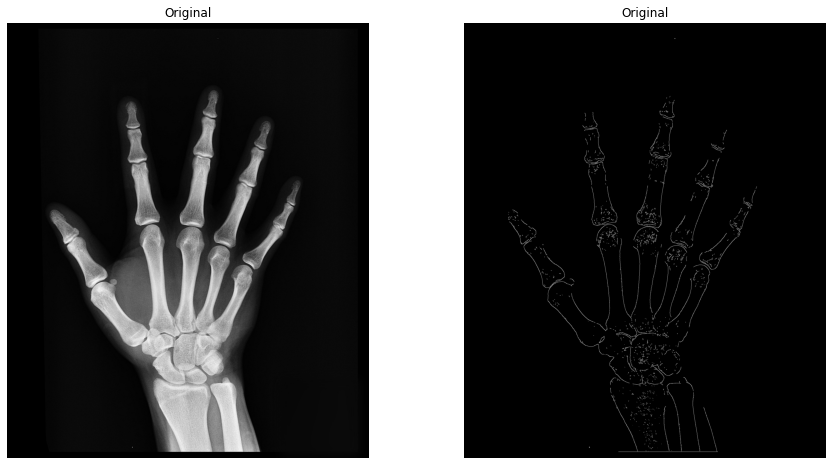

In [16]:
fig=plt.figure(figsize=(15,8))
fig.add_subplot(1,2,1)
plt.imshow(image,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,2,2)
plt.imshow(canny_edge,cmap='gray')
plt.axis("off")
plt.title("Original")

Thresholding


In [18]:
img = cv2.imread('images/Ciotola.jpeg')

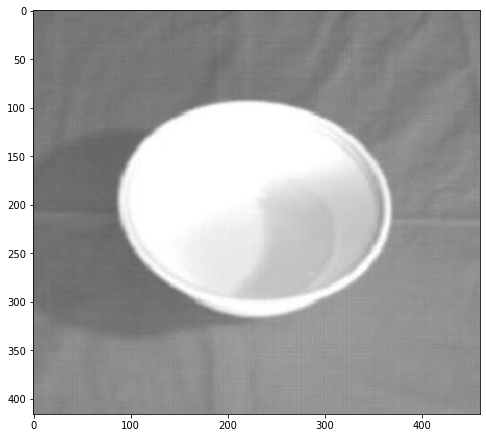

In [19]:
plt.imshow(img)

Text(0.5, 1.0, 'Image Histogram')

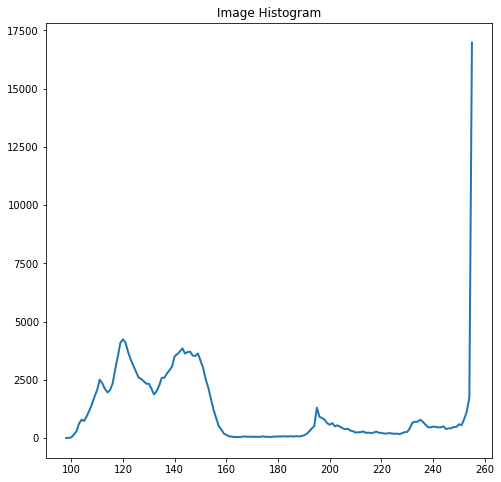

In [20]:
hist, bins_center = exposure.histogram(img[:,:,0])
plt.plot(bins_center, hist, lw=2)
plt.title('Image Histogram')

In [21]:
img[img<=160] = 0
img[img>160] = 255 

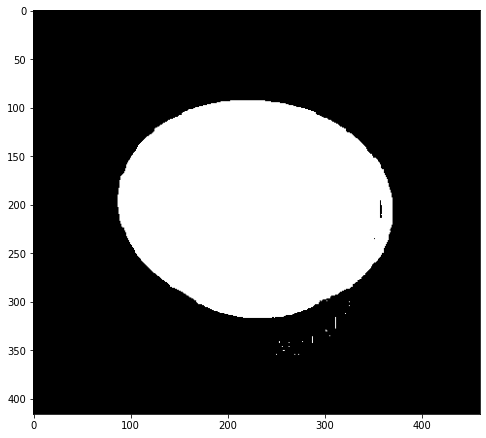

In [22]:
plt.imshow(img)

In [23]:
img2 = cv2.imread('images/ciotola2.jpeg')

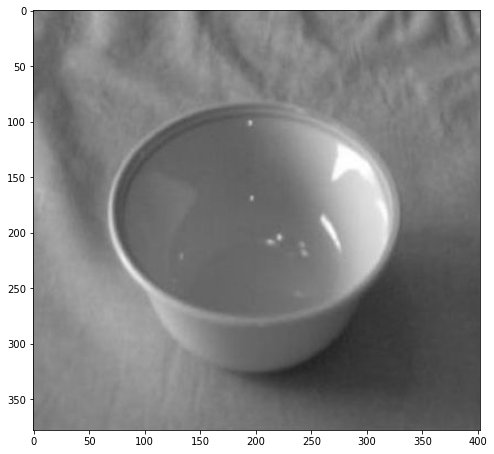

In [24]:
plt.imshow(img2)

/usr/local/lib/python3.9/dist-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


Text(0.5, 1.0, 'Image Histogram')

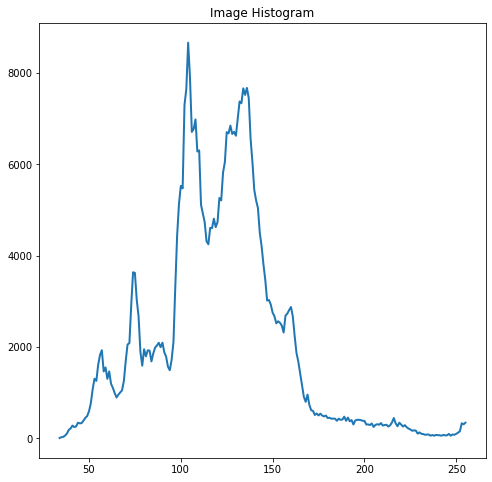

In [25]:
hist, bins_center = exposure.histogram(img2)
plt.plot(bins_center, hist, lw=2)
plt.title('Image Histogram')

In [26]:
hist1 = np.copy(img2)
hist1[hist1 <= 128] = 0
hist1[hist1 > 128] = 255

hist2 = np.copy(img2)
hist2[hist2 <= 160] = 0
hist2[hist2 > 160] = 255

Text(0.5, 1.0, 'T = 160')

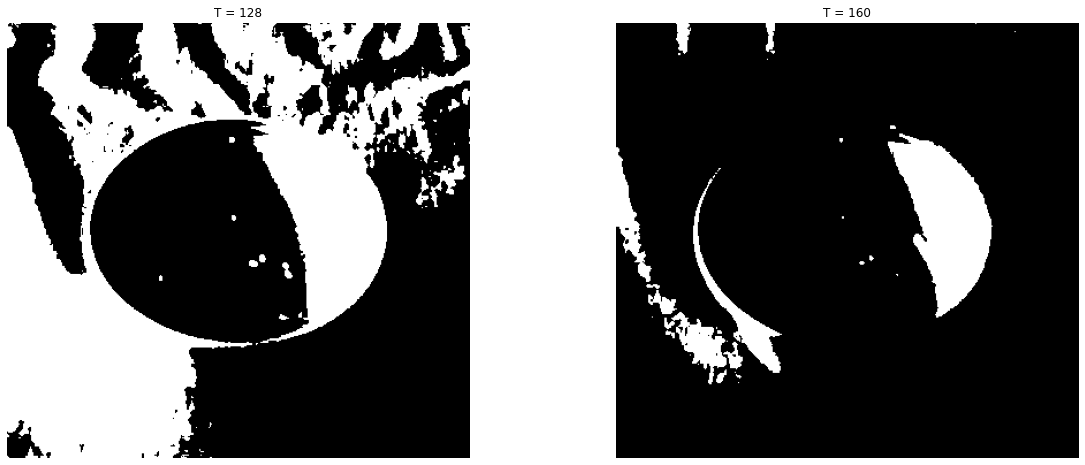

In [27]:
fig=plt.figure(figsize=(20,8))

fig.add_subplot(1,2,1)
plt.imshow(hist1)
plt.axis("off")
plt.title("T = 128")

fig.add_subplot(1,2,2)
plt.imshow(hist2)
plt.axis("off")
plt.title("T = 160")

In [28]:
hand = cv2.imread('images/hand-x-ray.jpeg')

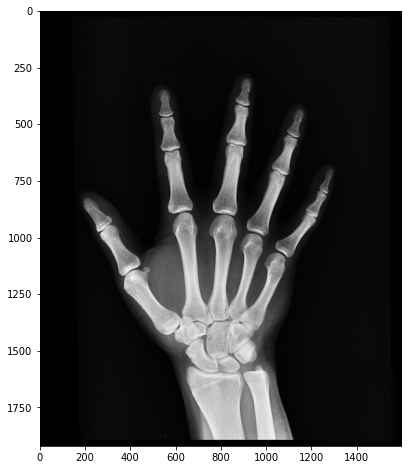

In [29]:
plt.imshow(hand)

Text(0.5, 1.0, 'Image Histogram')

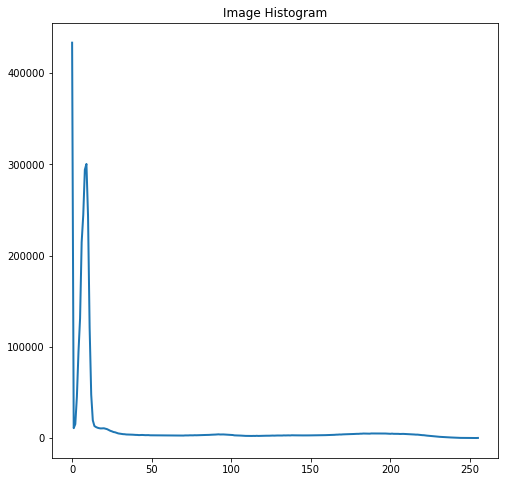

In [30]:
hist, bins_center = exposure.histogram(hand[:,:,0])
plt.plot(bins_center, hist, lw=2)
plt.title('Image Histogram')

In [31]:
hist3 = np.copy(hand)
hist3[hist3<=20] = 0
hist3[hist3>20] = 255 

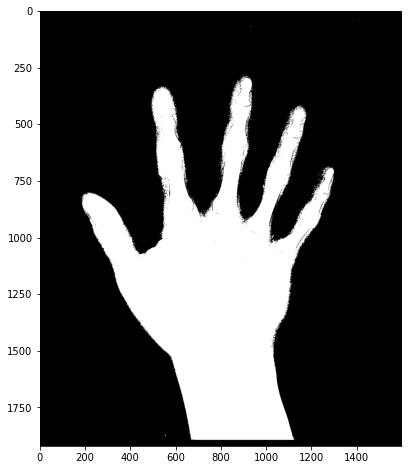

In [32]:
plt.imshow(hist3)

In [33]:
thresholds = threshold_otsu(hand[:,:,0])

In [34]:
print(thresholds)

87


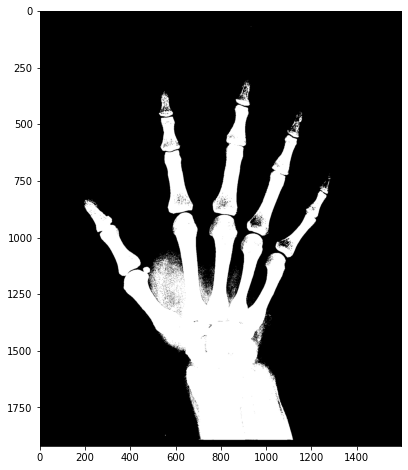

In [35]:
hand_otsu = np.copy(hand)
hand_otsu[hand_otsu<=thresholds] = 0
hand_otsu[hand_otsu>thresholds] = 255 
plt.imshow(hand_otsu)